# *Support Vector Machine(SVM)*

### Import Libraires

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load the data

In [2]:
from google.colab import files
upload = files.upload()

Saving cell_samples.csv to cell_samples.csv


In [4]:
data = pd.read_csv('cell_samples.csv')
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data.shape

(699, 11)

In [8]:
data.count()

ID             699
Clump          699
UnifSize       699
UnifShape      699
MargAdh        699
SingEpiSize    699
BareNuc        699
BlandChrom     699
NormNucl       699
Mit            699
Class          699
dtype: int64

In [6]:
data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [9]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

### Distribution of classes

In [10]:
malignant = data[data['Class'] == 4][0:200]
benign = data[data['Class'] == 2][0:200]

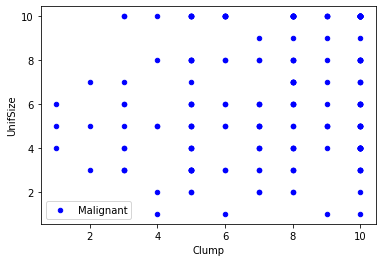

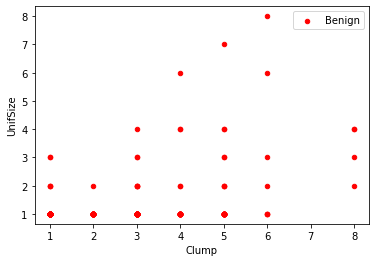

In [14]:
axes = malignant.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Malignant')
benign.plot(kind='scatter',x='Clump',y='UnifSize',color='red',label='Benign')

### Identifying unwanted rows/columns

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [20]:
#Converting object dtype to numeric
data = data[pd.to_numeric(data['BareNuc'], errors='coerce').notnull()]
data['BareNuc'] = data['BareNuc'].astype(int)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


### Identifying input and target columns

In [22]:
data.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [23]:
#Idependent variable 
X = data.drop(columns=['ID','Class'])
y = data['Class']

In [24]:
X[0:5]

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [25]:
y[0:5]

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

### Splitting the data into Train and Test datasets

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=4)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(546, 9)
(137, 9)
(546,)
(137,)


### Model Defining

In [31]:
from sklearn import svm

In [34]:
model = svm.SVC(kernel='linear', gamma='auto', C=2)

In [35]:
model.fit(X_train, y_train)

SVC(C=2, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
preds = model.predict(X_test)

In [38]:
preds

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4])

### Evaluation

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
print(accuracy_score(y_test, preds))

0.9635036496350365


In [41]:
print(confusion_matrix(y_test, preds))

[[85  5]
 [ 0 47]]


In [42]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

